In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
data, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=10)

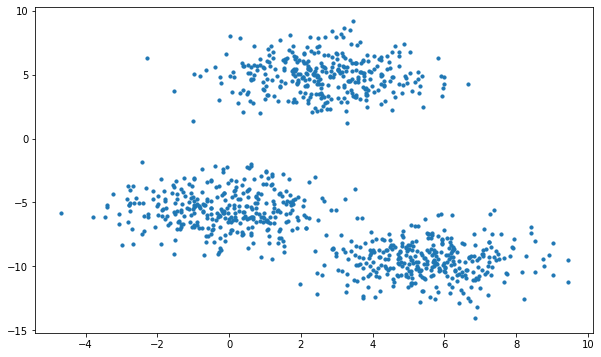

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.show()

In [12]:
data[:5]

array([[  4.14012909, -10.13137814],
       [  2.19434518,   2.78395719],
       [ -0.01132247,  -6.32354361],
       [  0.20315879,  -3.81681749],
       [  1.1222706 ,   5.99614545]])

In [76]:
k = 3
centroid_x = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)
centroid_y = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)

In [77]:
centroid_x, centroid_y

(array([-1,  1,  2]), array([4, 4, 8]))

In [78]:
centroids = np.array(list(zip(centroid_x, centroid_y)))

In [79]:
centroids

array([[-1,  4],
       [ 1,  4],
       [ 2,  8]])

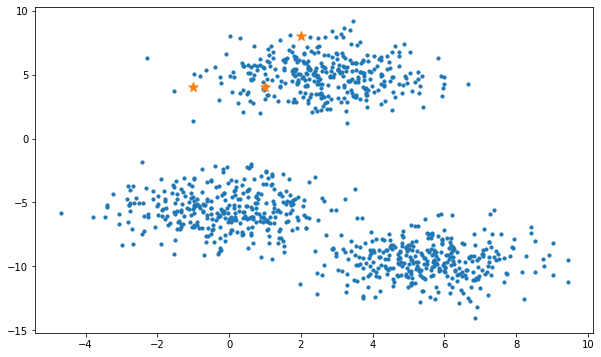

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.scatter(centroid_x, centroid_y, s=100, marker='*')
plt.show()

In [81]:
# we need to find distance of two things
# 1. distance b/w data points and centroid
# 2. distance b/w prev centroid and new centroid - error
def euclidean_dist(a,b, axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [82]:
centroids_old = np.zeros_like(centroids)

In [83]:
centroids_old

array([[0, 0],
       [0, 0],
       [0, 0]])

In [84]:
clusters = np.zeros(len(data))

In [85]:
clusters[:5]

array([0., 0., 0., 0., 0.])

In [86]:
error = euclidean_dist(centroids,centroids_old, None)

In [87]:
error

10.099504938362077

In [88]:
def plotData(clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1], s=10, c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='purple')
    plt.show()

In [89]:
from copy import deepcopy

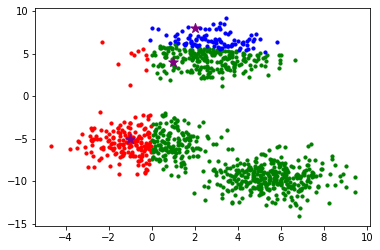

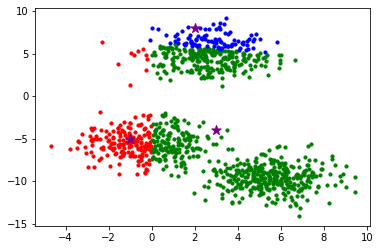

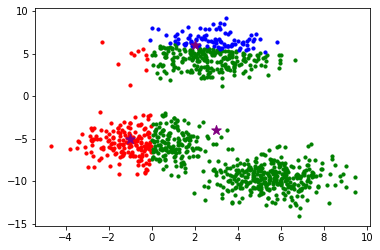

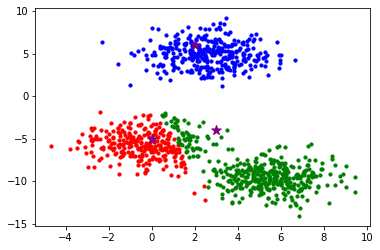

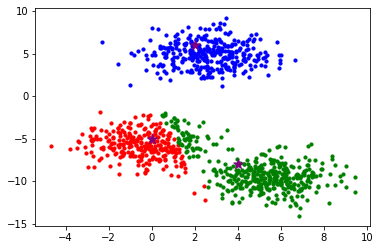

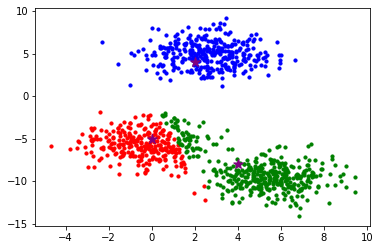

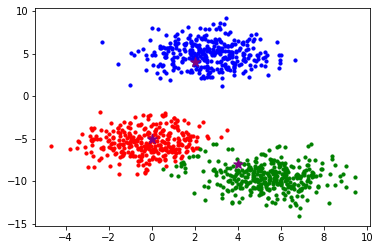

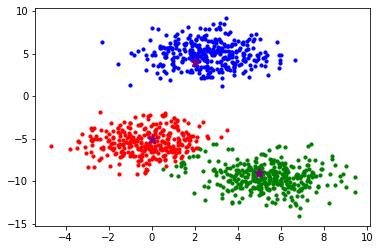

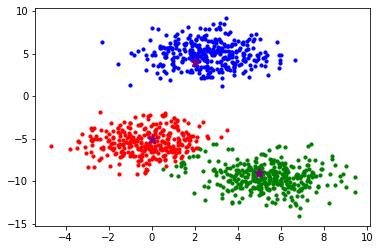

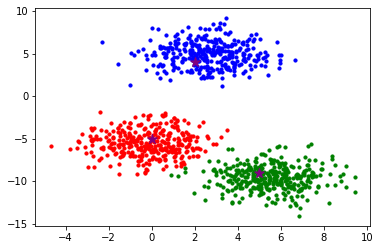

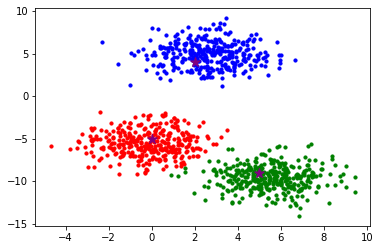

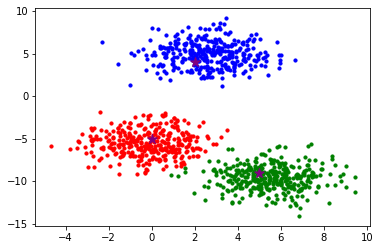

In [90]:
while error != 0:
    for i in range(len(data)):
        distance = euclidean_dist(data[i], centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    centroids_old = deepcopy(centroids)
    
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData(clusters, centroids)
    error = euclidean_dist(centroids,centroids_old, None)

In [51]:
error

0.0

In [55]:
# clusters

In [56]:
centroids

array([[ 2, -7],
       [ 3,  2],
       [ 2,  5]])

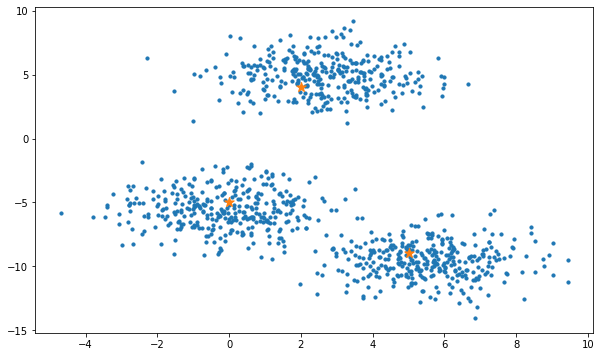

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='*')
plt.show()